In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("Final-snapdeal-dataset.csv")

X = df[["Product_Title", "Selling_Price", "MRP", "Discount_Pct", "Review_Count"]]
y = df["Is_Grey_Market"]

preprocessor = ColumnTransformer([
    ("text", TfidfVectorizer(max_features=3000, ngram_range=(1, 2), min_df=2), "Product_Title"),
    ("num", StandardScaler(), ["Selling_Price", "MRP", "Discount_Pct", "Review_Count"])
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        93
           1       0.54      1.00      0.70         7

    accuracy                           0.94       100
   macro avg       0.77      0.97      0.83       100
weighted avg       0.97      0.94      0.95       100



In [44]:
print(df["Is_Grey_Market"].value_counts(normalize=True))

Is_Grey_Market
0    0.928
1    0.072
Name: proportion, dtype: float64


[[87  6]
 [ 0  7]]
0.9969278033794163


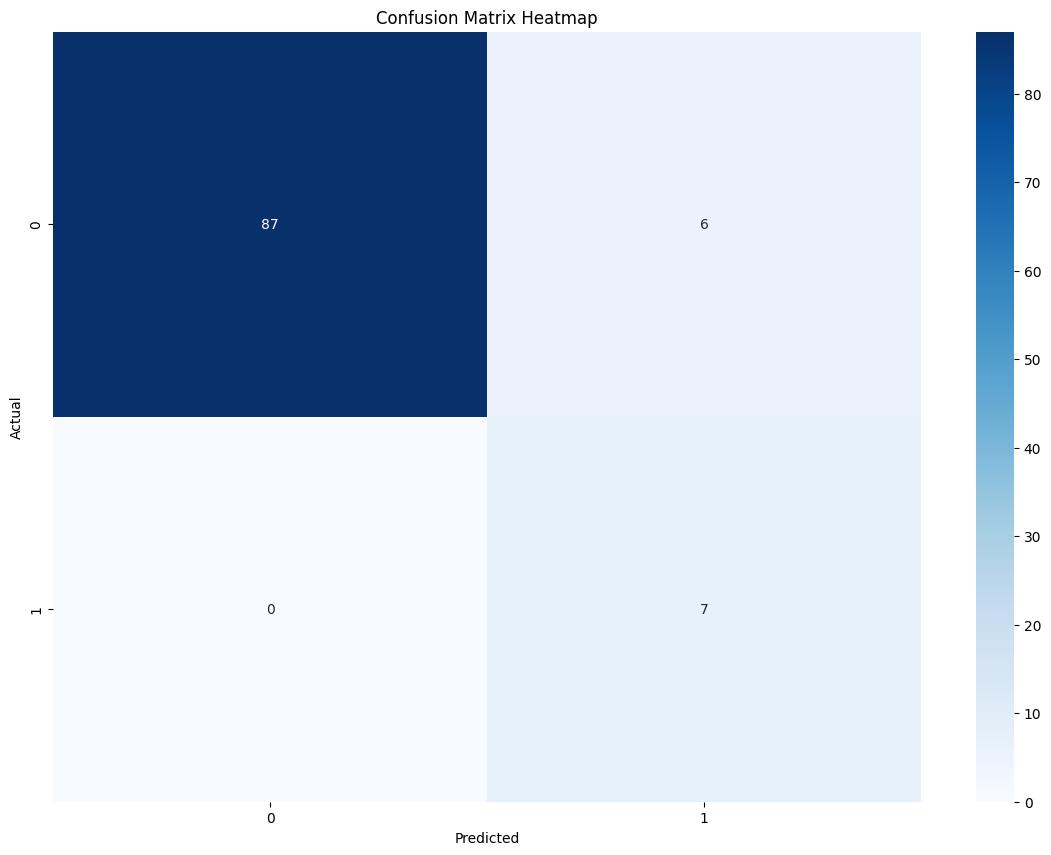

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix Heatmap')
plt.show()

In [46]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.75).astype(int)

In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring="f1")
print("Mean F1:", scores.mean())

Mean F1: 0.6584230691671709


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

model.fit(X_train, y_train)

y_preds = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

0.99
[[93  0]
 [ 1  6]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       1.00      0.86      0.92         7

    accuracy                           0.99       100
   macro avg       0.99      0.93      0.96       100
weighted avg       0.99      0.99      0.99       100

ROC-AUC: 1.0


[[93  0]
 [ 1  6]]
1.0


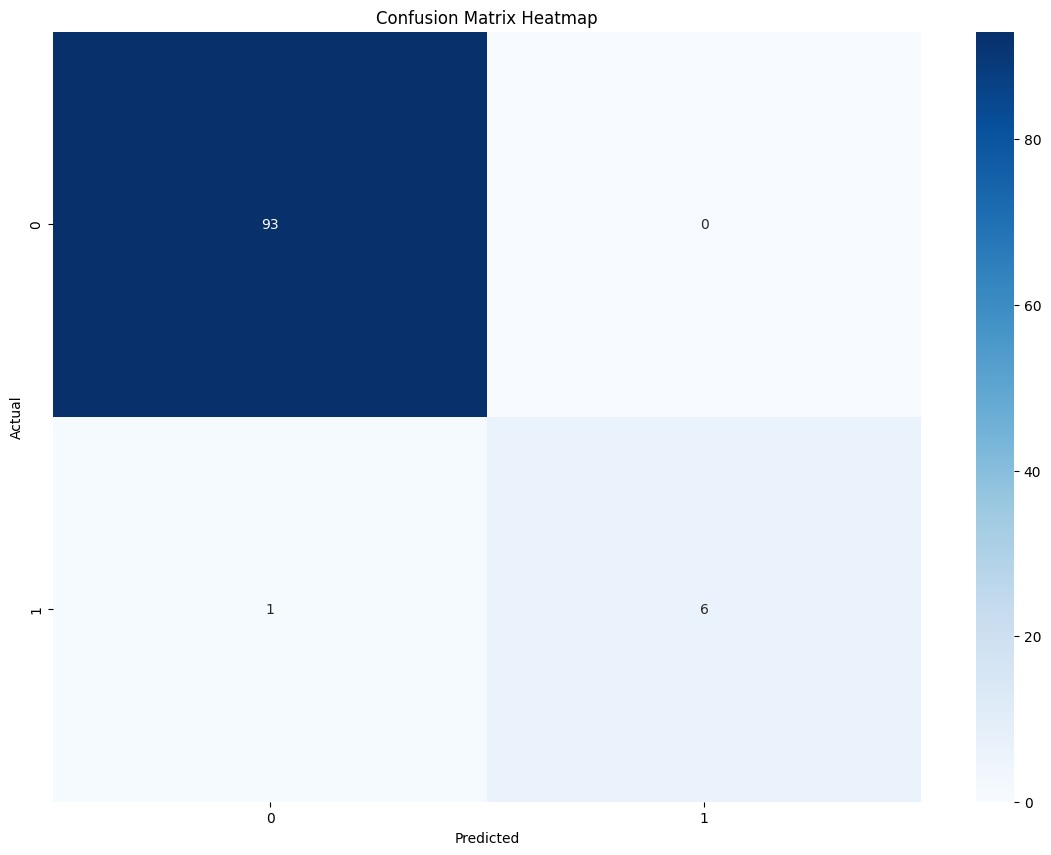

In [49]:
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix Heatmap')
plt.show()

In [50]:
import joblib

joblib.dump(model, "grey_market_model.pkl")

['grey_market_model.pkl']